In [4]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [5]:
# Step 2: Load the Dataset
# Normalize column names (strip spaces, lowercase) for consistency
df = pd.read_csv("covid clinical trials.csv")  # Replace with correct path
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(" ", "_").str.lower()  # standardize

# Preview the first few rows
print(df.head())

   rank   nct_number                                              title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        acronym                  status         study_results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [6]:
# Step 3: Initial Data Exploration and Cleaning

# 1. Basic structure info
print(df.info())

# 2. Summary statistics
print(df.describe())
print(df.describe(include=["object"]))

# 3. Missing values count
print(df.isnull().sum())

# 4. Drop columns safely if they exist
for col in ["results_first_posted", "study_documents"]:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# 5. Fill missing categorical values with "Missing"
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col].fillna("Missing", inplace=True)

# 6. Fill missing numeric values with median
numeric_cols = df.select_dtypes(exclude=["object"]).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 7. Verify missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     5783 non-null   int64  
 1   nct_number               5783 non-null   object 
 2   title                    5783 non-null   object 
 3   acronym                  2480 non-null   object 
 4   status                   5783 non-null   object 
 5   study_results            5783 non-null   object 
 6   conditions               5783 non-null   object 
 7   interventions            4897 non-null   object 
 8   outcome_measures         5748 non-null   object 
 9   sponsor/collaborators    5783 non-null   object 
 10  gender                   5773 non-null   object 
 11  age                      5783 non-null   object 
 12  phases                   3322 non-null   object 
 13  enrollment               5749 non-null   float64
 14  funded_bys              

C:\Users\Sneha\AppData\Local\Temp\ipykernel_21832\1682566562.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Missing", inplace=True)
C:\Users\Sneha\AppData\Local\Temp\ipykernel_21832\1682566562.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


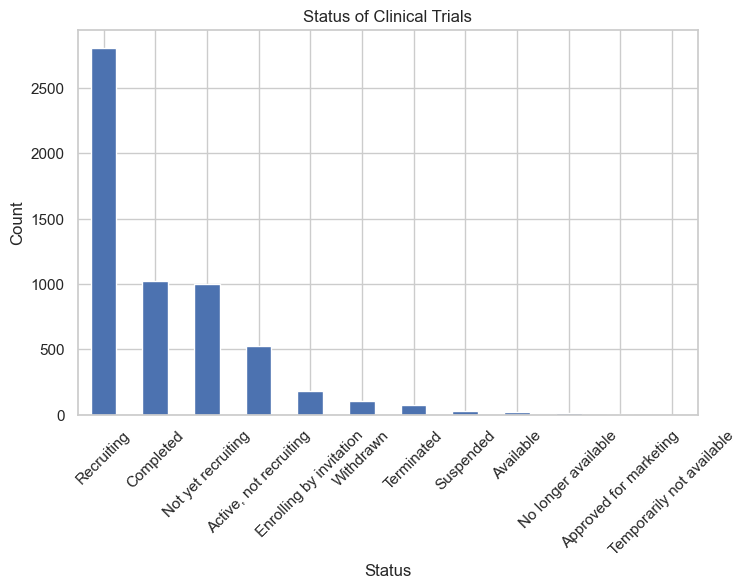

phases
Missing            2461
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


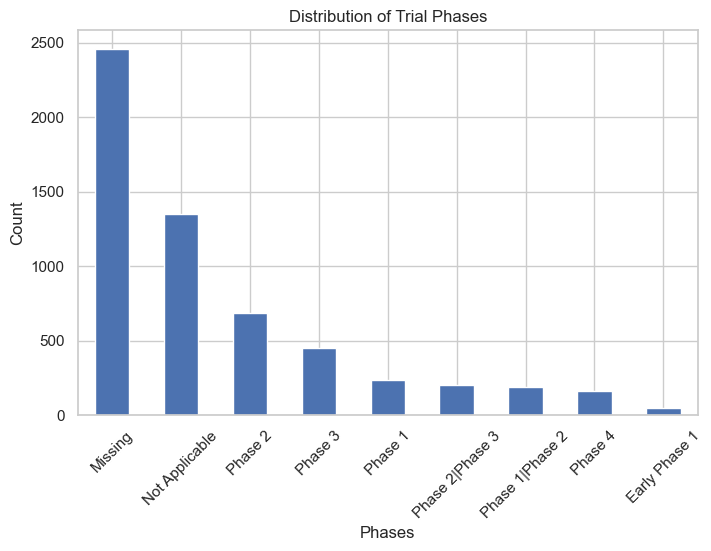

age
18 Years and older   (Adult, Older Adult)      2885
Child, Adult, Older Adult                       486
18 Years to 80 Years   (Adult, Older Adult)     221
18 Years to 65 Years   (Adult, Older Adult)     155
18 Years to 75 Years   (Adult, Older Adult)     135
                                               ... 
6 Years to 12 Years   (Child)                     1
15 Years to 19 Years   (Child, Adult)             1
up to 1 Year   (Child)                            1
21 Years to 45 Years   (Adult)                    1
8 Years to 20 Years   (Child, Adult)              1
Name: count, Length: 417, dtype: int64


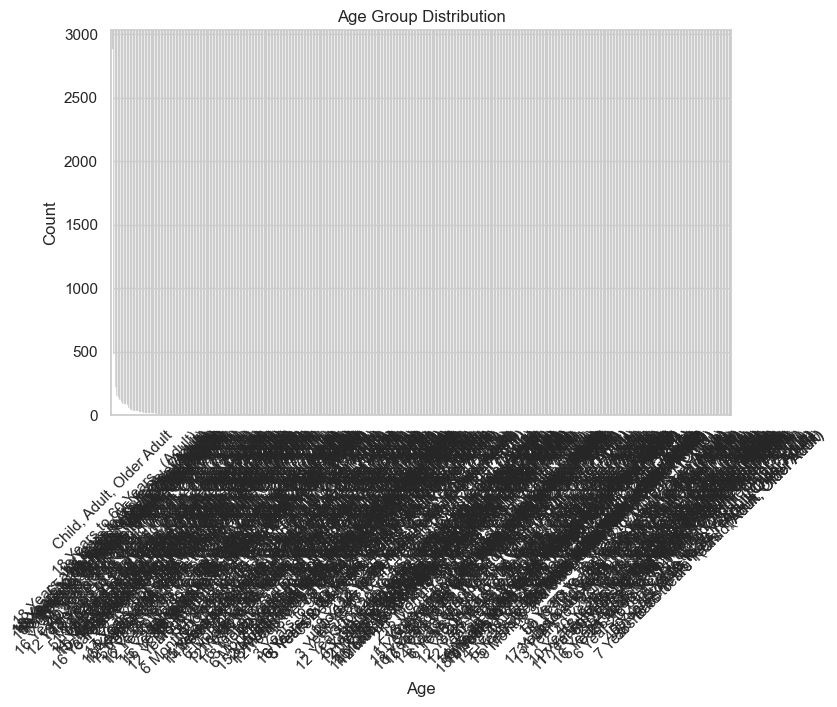

gender
All        5567
Female      162
Male         44
Missing      10
Name: count, dtype: int64


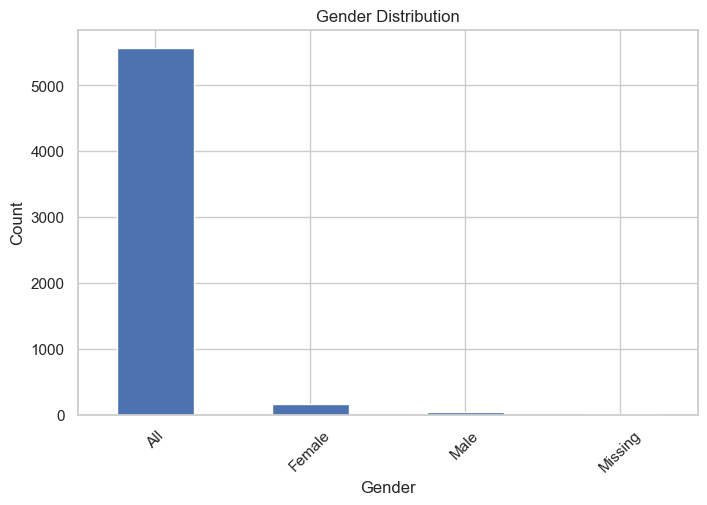

In [7]:
# Step 4: Univariate Analysis

# Helper function to plot categorical distributions
def plot_distribution(data, col, title):
    ax = data[col].value_counts().plot(kind="bar", title=title)
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Status distribution
print(df["status"].value_counts())
plot_distribution(df, "status", "Status of Clinical Trials")

# Phases distribution
print(df["phases"].value_counts())
plot_distribution(df, "phases", "Distribution of Trial Phases")

# Age distribution
if "age" in df.columns:
    print(df["age"].value_counts())
    plot_distribution(df, "age", "Age Group Distribution")

# Gender distribution
if "gender" in df.columns:
    print(df["gender"].value_counts())
    plot_distribution(df, "gender", "Gender Distribution")

phases                     Early Phase 1  Missing  Not Applicable  Phase 1  \
status                                                                       
Active, not recruiting                 7      175             111       44   
Approved for marketing                 0        2               0        0   
Available                              0       19               0        0   
Completed                              3      565             226       38   
Enrolling by invitation                4       96              54        1   
No longer available                    0       12               0        0   
Not yet recruiting                     5      350             282       42   
Recruiting                            22     1224             647       98   
Suspended                              2        2               2        0   
Temporarily not available              0        1               0        0   
Terminated                             0        4              1

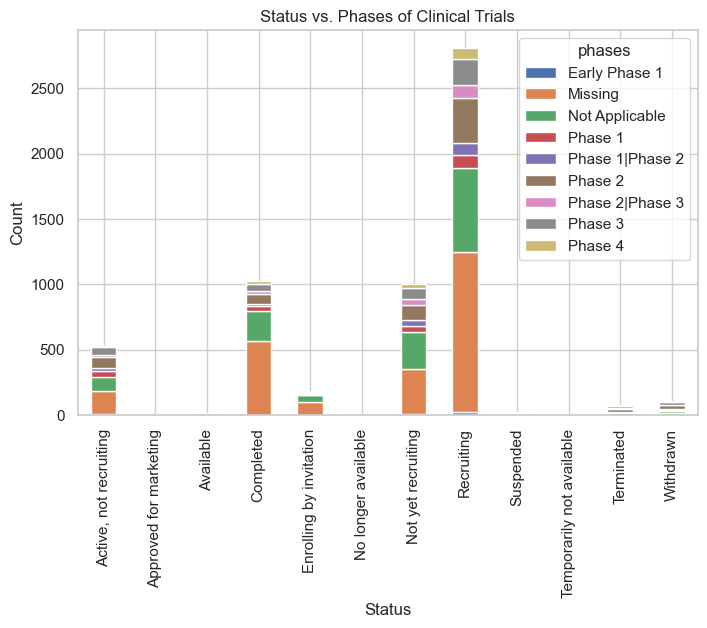

                                          conditions  \
0                             2019 Novel Coronavirus   
1                   2019 Novel Coronavirus Infection   
2  2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                   2019 Novel Coronavirus Pneumonia   
4          2019 Novel Coronavirus Pneumonia|COVID-19   

                                    outcome_measures  
0  Proportion of participants who improve by at l...  
1  new-onset COVID-19|Number of Participants with...  
2  Number of participants with treatment emergent...  
3  Clinical recovery time|Complete fever time|Cou...  
4  Pneumonia severity index|Oxygenation index (Pa...  


In [8]:
# Step 5: Bivariate Analysis

# Status vs. Phases
if "status" in df.columns and "phases" in df.columns:
    status_phase = pd.crosstab(df["status"], df["phases"])
    print(status_phase)
    status_phase.plot(kind="bar", stacked=True, title="Status vs. Phases of Clinical Trials")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.show()

# Conditions vs. Outcome Measures
if "conditions" in df.columns and "outcome_measures" in df.columns:
    conditions_outcomes = (
        df.groupby("conditions")["outcome_measures"]
        .apply(lambda x: ", ".join(x.dropna().unique()))
        .reset_index()
    )
    print(conditions_outcomes.head())

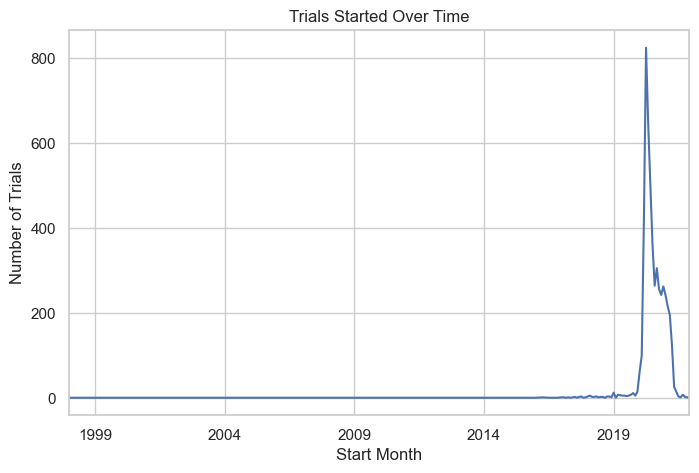

In [9]:
# Step 6: Time Series Analysis

# Convert date columns safely
for col in ["start_date", "primary_completion_date"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Plot trial start count over months
if "start_date" in df.columns:
    df["start_month"] = df["start_date"].dt.to_period("M")
    df["start_month"].value_counts().sort_index().plot(kind="line", title="Trials Started Over Time")
    plt.xlabel("Start Month")
    plt.ylabel("Number of Trials")
    plt.show()

In [10]:
# Step 7: Save cleaned dataset
df.to_csv("cleaned_covid_clinical_trials.csv", index=False)

In [12]:
## 📌 Final Conclusion

Through this Exploratory Data Analysis (EDA) of the COVID-19 Clinical Trials dataset, the following insights were derived:

- The majority of clinical trials are in the **Completed** and **Ongoing** status categories.  
- Most studies are concentrated in **Phase 2 and Phase 3**, reflecting the global urgency for vaccines and treatments.  
- Trials were primarily targeted at **adult populations**, though some included all age groups.  
- The **Status vs. Phase** analysis revealed that ongoing trials are mostly in early phases, while completed ones are concentrated in later phases.  
- Time-series analysis showed a steady rise in the number of clinical trials over time, peaking during major COVID-19 waves.  

✅ Overall, this analysis provided a clear picture of how the global medical community mobilized during the pandemic, highlighting trial statuses, phases, and demographic coverage.
